In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Use the followinf Data to make a Machine Learning Model to predict Credit card Approval**

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-approval/cc_approvals.data',header=None)

cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity',
        'YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen',
        'ZipCode','Income','ApprovalStatus']

df.columns = cols
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [4]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [5]:
df.shape

(690, 16)

In [6]:
(df == '?').sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [7]:
#convert all '?' into null or blank cells
df1 = df.applymap(lambda x: np.nan if x == '?' else x)
df1.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
df1.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [9]:
#%ge of data we may loose if we drop rows with null values

(len(df1) - len(df1.dropna()))/len(df1)

0.0536231884057971

In [10]:
df2 = df1.dropna()     #drops all the rows with null values

In [11]:
df2['Age'] = df2['Age'].astype(float)
df2['ZipCode'] = df2['ZipCode'].astype(int)

/tmp/ipykernel_32/509429010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2['Age'].astype(float)
/tmp/ipykernel_32/509429010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ZipCode'] = df2['ZipCode'].astype(int)


In [12]:
df2.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [13]:
df2['ApprovalStatus'].unique()

array(['+', '-'], dtype=object)

In [14]:
df2['ApprovalStatus'] = df2['ApprovalStatus'].map({'+' : 1, '-' : 0})

/tmp/ipykernel_32/2026905594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ApprovalStatus'] = df2['ApprovalStatus'].map({'+' : 1, '-' : 0})


In [15]:
df2.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode             int64
Income              int64
ApprovalStatus      int64
dtype: object

In [16]:
list(df2.columns[df2.dtypes == object])      #columns having non-numerical data

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen']

In [17]:
df2_non_num  = df2[list(df2.columns[df2.dtypes == object])]
df2_non_num.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [18]:
df2.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')

In [19]:
list(df2.columns[(df2.dtypes == float) | (df2.dtypes == int)])  #Columns having numerical data

['Age',
 'Debt',
 'YearsEmployed',
 'CreditScore',
 'ZipCode',
 'Income',
 'ApprovalStatus']

In [20]:
df2_num = df2[list(df2.columns[(df2.dtypes == float) | (df2.dtypes == int)])]
df2_num.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,ApprovalStatus
0,30.83,0.000,1.25,1,202,0,1
1,58.67,4.460,3.04,6,43,560,1
2,24.50,0.500,1.50,0,280,824,1
3,27.83,1.540,3.75,5,100,3,1
4,20.17,5.625,1.71,0,120,0,1


In [21]:
df2.groupby('ApprovalStatus')['Age'].agg(['mean','median','max','min'])

,mean,median,max,min
ApprovalStatus,,,,
0,29.562269,26.92,74.83,15.17
1,33.845473,31.04,76.75,13.75


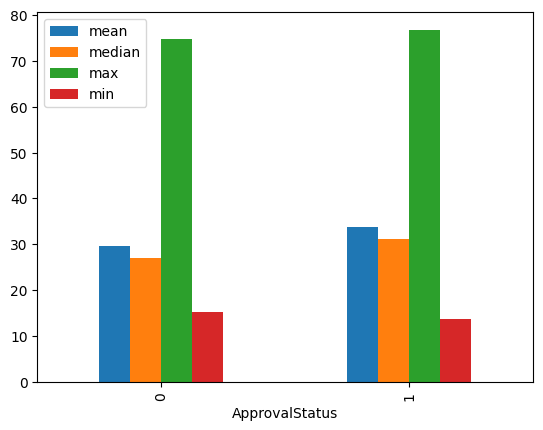

In [22]:
df2.groupby('ApprovalStatus')['Age'].agg(['mean','median','max','min']).plot.bar()
plt.show()

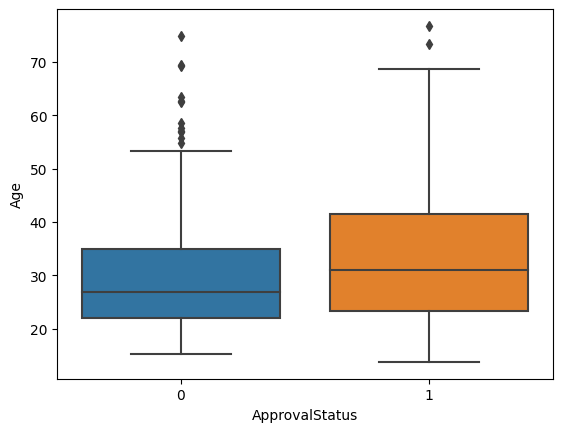

In [23]:
sns.boxplot(data = df2 , x = 'ApprovalStatus' , y = 'Age')
plt.show()

In [24]:
#Break the data into two parts => Card not Approved & Card Approved

df2_a0 = df2[df2['ApprovalStatus'] == 0]
df2_a1 = df2[df2['ApprovalStatus'] == 1]

In [25]:
#Outlier analysis for data where card is not approved

q1 = np.percentile(df2_a0['Age'],25)
q3 = np.percentile(df2_a0['Age'],75)
print(q3 , q1)
print()
iqr = q3 - q1
print(iqr)
print()
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf , uf)
print()
percentage_of_outlier_0 = ((df2_a0['Age'] > uf) | (df2_a0['Age'] < lf)).sum()/len(df2)
print(percentage_of_outlier_0)

34.83 21.92

12.909999999999997

2.555000000000007 54.19499999999999

0.018376722817764167


In [26]:
df2_a0.shape

(357, 16)

In [27]:
df2_a1.shape

(296, 16)

* remove data came under outlier category for class 0, i.e. when card was not approved

In [28]:
#updating data after removing outliers
df2_a0 = df2_a0[~((df2_a0['Age'] > uf) | (df2_a0['Age'] < lf))]

In [29]:
df2_a0.shape

(345, 16)

In [30]:
#Outlier analysis for data where card is approved

q1 = np.percentile(df2_a1['Age'],25)
q3 = np.percentile(df2_a1['Age'],75)
print(q3 , q1)
print()
iqr = q3 - q1
print(iqr)
print()
lf = q1 - 1.5 * iqr       #lower fence
uf = q3 + 1.5 * iqr       #upper fence
print(lf , uf)
print()
percentage_of_outlier_1 = ((df2_a1['Age'] > uf) | (df2_a1['Age'] < lf)).sum()/len(df2)
print(percentage_of_outlier_1)

41.44 23.25

18.189999999999998

-4.034999999999997 68.725

0.0030627871362940277


* remove data came under outlier category for class 1, i.e. when card was approved

In [31]:
#updating data without outliers

df2_a1 = df2_a1[~((df2_a1['Age'] > uf) | (df2_a1['Age'] < lf))]

In [32]:
df2_a1.shape

(294, 16)

In [33]:
#Join back df2_a0 & df2_a1

df3 = pd.concat((df2_a0,df2_a1))

In [34]:
print(df2.shape)
print(df3.shape)

(653, 16)
(639, 16)


In [35]:
(len(df2) - len(df3))/len(df2)

0.021439509954058193

**Overall Outlier Analysis**

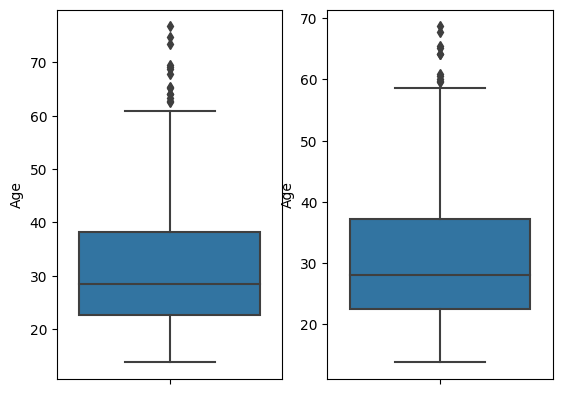

In [36]:
plt.subplot(1,2,1)
sns.boxplot(data = df2  , y = 'Age')

plt.subplot(1,2,2)
sns.boxplot(data = df3  , y = 'Age')

plt.show()

In [37]:
q1 = np.percentile(df2['Age'],25)
q3 = np.percentile(df2['Age'],75)
print(q3 , q1)
print()
iqr = q3 - q1
print(iqr)
print()
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf , uf)

38.25 22.58

15.670000000000002

-0.9250000000000043 61.755


In [38]:
((df2['Age'] > uf) | (df2['Age'] < lf)).sum()/len(df)

0.020289855072463767

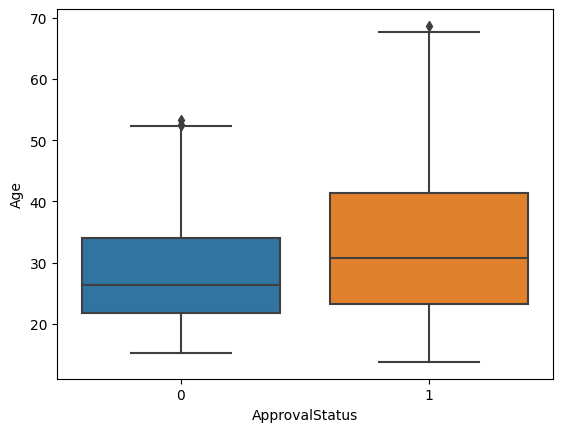

In [39]:
sns.boxplot(data = df3 , x = 'ApprovalStatus' , y = 'Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


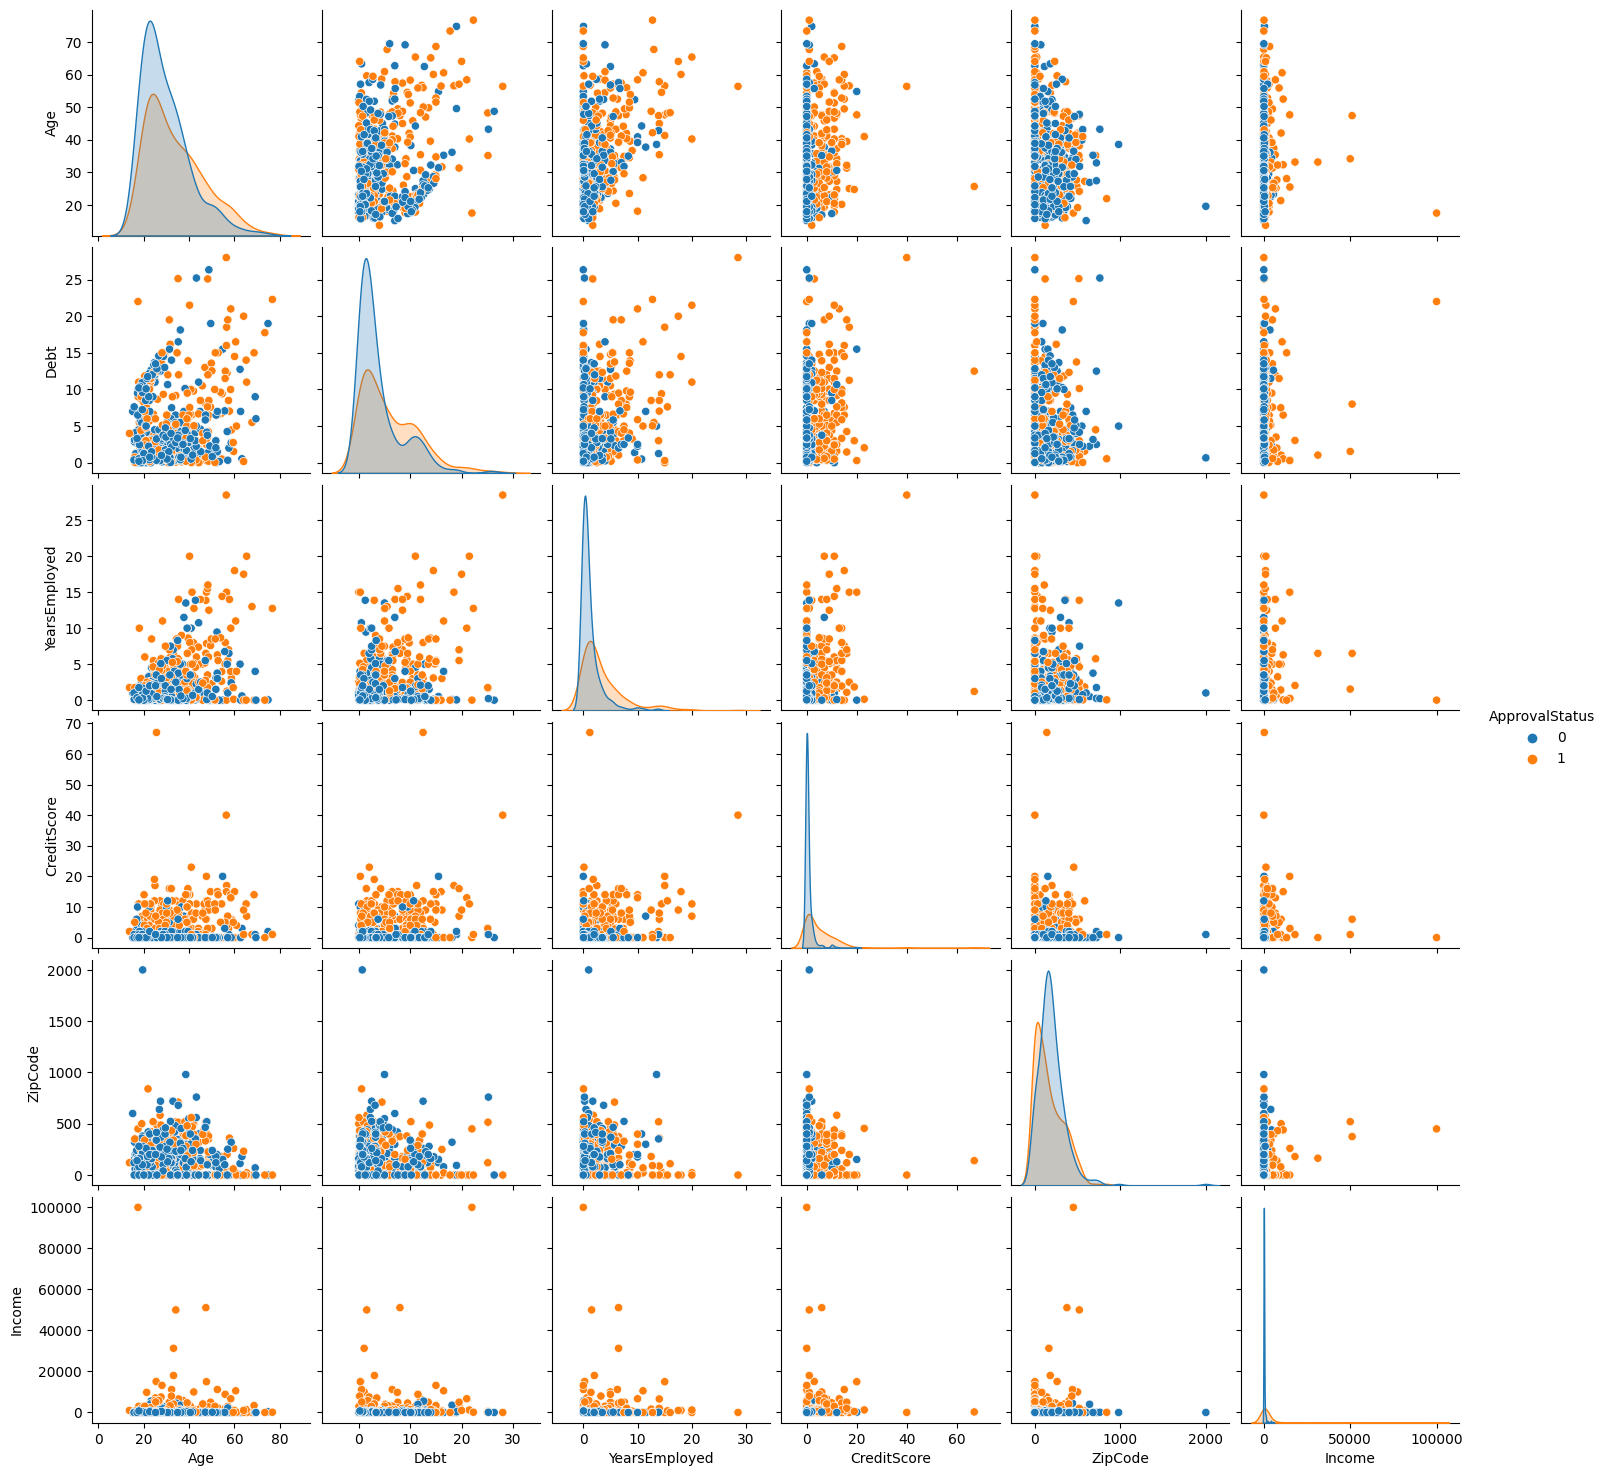

In [40]:
sns.pairplot(df2_num , hue = 'ApprovalStatus')
plt.show()

In [41]:
df3.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
70,b,32.33,7.50,u,g,e,bb,1.585,t,f,0,t,s,420,0,0
72,a,38.58,5.00,u,g,cc,v,13.500,t,f,0,t,g,980,0,0
73,b,44.25,0.50,u,g,m,v,10.750,t,f,0,f,s,400,0,0
74,b,44.83,7.00,y,p,c,v,1.625,f,f,0,f,g,160,2,0
75,b,20.67,5.29,u,g,q,v,0.375,t,t,1,f,g,160,0,0


In [43]:
df4 = pd.get_dummies(df3)
df4.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,ApprovalStatus,Gender_a,Gender_b,Married_l,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
70,32.33,7.50,1.585,0,420,0,0,False,True,False,...,False,False,True,True,False,False,True,False,False,True
72,38.58,5.00,13.500,0,980,0,0,True,False,False,...,False,False,True,True,False,False,True,True,False,False
73,44.25,0.50,10.750,0,400,0,0,False,True,False,...,False,False,True,True,False,True,False,False,False,True
74,44.83,7.00,1.625,0,160,2,0,False,True,False,...,False,True,False,True,False,True,False,True,False,False
75,20.67,5.29,0.375,1,160,0,0,False,True,False,...,False,False,True,False,True,True,False,True,False,False


In [44]:
df4['ApprovalStatus'].value_counts()

ApprovalStatus
0    345
1    294
Name: count, dtype: int64

In [45]:
X = df4.drop('ApprovalStatus', axis = 'columns')
Y = df4['ApprovalStatus']

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

****
K_Nearest_Neighbors
****

In [50]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(xtrain,ytrain)

print("Train Data Accuracy" , model1.score(xtrain,ytrain))
print("Test Data Accuracy" , model1.score(xtest,ytest))

Train Data Accuracy 0.7690802348336595
Test Data Accuracy 0.6953125


In [52]:
confusion_matrix(ytrain , model1.predict(xtrain))

array([[231,  44],
       [ 74, 162]])

In [53]:
confusion_matrix(ytest , model1.predict(xtest))

array([[54, 16],
       [23, 35]])

In [56]:
print(classification_report(ytrain , model1.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       275
           1       0.79      0.69      0.73       236

    accuracy                           0.77       511
   macro avg       0.77      0.76      0.76       511
weighted avg       0.77      0.77      0.77       511



In [57]:
print(classification_report(ytest , model1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        70
           1       0.69      0.60      0.64        58

    accuracy                           0.70       128
   macro avg       0.69      0.69      0.69       128
weighted avg       0.69      0.70      0.69       128



****
Logistic Regression
****

In [58]:
model2 = LogisticRegression()
model2.fit(xtrain,ytrain)

print("Train Data Accuracy=" , model2.score(xtrain,ytrain))
print("Test Data Accuracy=" , model2.score(xtest,ytest))

Train Data Accuracy= 0.8767123287671232
Test Data Accuracy= 0.8671875


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print(classification_report(ytrain , model2.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       275
           1       0.86      0.88      0.87       236

    accuracy                           0.88       511
   macro avg       0.88      0.88      0.88       511
weighted avg       0.88      0.88      0.88       511



In [60]:
print(classification_report(ytest , model2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        70
           1       0.87      0.83      0.85        58

    accuracy                           0.87       128
   macro avg       0.87      0.86      0.87       128
weighted avg       0.87      0.87      0.87       128



****
Decision Tree Classifier
****

In [65]:
#Grid Search CV -> to tune hyperparameter for the model

from sklearn.model_selection import GridSearchCV

model3 = DecisionTreeClassifier()

param_grid = {
    'max_depth' : [None,1,2,3,4],
    'min_samples_split' : [5,7,9,10,11],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(model3 , param_grid , cv=5)

#fit the data into grid search object
grid_search.fit(X,Y)

#Best Hyperparameter
print("Best Hyperparameter:" , grid_search.best_params_)

Best Hyperparameter: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [66]:
model4 = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1, min_samples_split = 5)
model4.fit(xtrain,ytrain)

print("Train Data Accuracy=" , model4.score(xtrain,ytrain))
print("Test Data Accuracy=" , model4.score(xtest,ytest))

Train Data Accuracy= 0.8688845401174168
Test Data Accuracy= 0.8671875


In [67]:
print(classification_report(ytrain , model4.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       275
           1       0.81      0.94      0.87       236

    accuracy                           0.87       511
   macro avg       0.87      0.87      0.87       511
weighted avg       0.88      0.87      0.87       511



In [68]:
print(classification_report(ytest , model4.predict(xtest)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        70
           1       0.80      0.95      0.87        58

    accuracy                           0.87       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.87      0.87       128



****
Random Forest Classifier
****

In [70]:
#Grid Search CV -> to tune hyperparameter for the model

from sklearn.model_selection import GridSearchCV

model5 = RandomForestClassifier()

param_grid = {
    'n_estimators' : [5,10,20,40,80],
    'max_depth' : [None,1,2,3,4],
    'min_samples_split' : [5,7,9,10,11],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(model5 , param_grid , cv=5)

#fit the data into grid search object
grid_search.fit(X,Y)

#Best Hyperparameter
print("Best Hyperparameter:" , grid_search.best_params_)

Best Hyperparameter: {'max_depth': 1, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 80}


In [71]:
model6 = RandomForestClassifier(max_depth = 1, min_samples_leaf =  7, 
                                min_samples_split = 9, n_estimators = 80)

model6.fit(xtrain,ytrain)

print("Train Data Accuracy=" , model6.score(xtrain,ytrain))
print("Test Data Accuracy=" , model6.score(xtest,ytest))

Train Data Accuracy= 0.8786692759295499
Test Data Accuracy= 0.8828125


In [72]:
print(classification_report(ytrain , model6.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       275
           1       0.92      0.81      0.86       236

    accuracy                           0.88       511
   macro avg       0.89      0.87      0.88       511
weighted avg       0.88      0.88      0.88       511



In [73]:
print(classification_report(ytest , model4.predict(xtest)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        70
           1       0.80      0.95      0.87        58

    accuracy                           0.87       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.87      0.87       128



**ROC AUC Curve**

In [74]:
from sklearn.metrics import roc_curve,roc_auc_score

In [78]:
#model1.predict_proba(xtrain)[:,1]

In [79]:
aucKNN = roc_auc_score(ytrain , model1.predict_proba(xtrain)[:,1])
aucLogistic = roc_auc_score(ytrain , model2.predict_proba(xtrain)[:,1])
aucDTC = roc_auc_score(ytrain , model4.predict_proba(xtrain)[:,1])
aucRFC = roc_auc_score(ytrain , model6.predict_proba(xtrain)[:,1])

print("KNN=", aucKNN)
print("Logistic=", aucLogistic)
print("DecisionTreeClassifier=", aucDTC)
print("RandomForestClassifier=", aucRFC)

KNN= 0.8620030816640986
Logistic= 0.939784283513097
DecisionTreeClassifier= 0.8736748844375962
RandomForestClassifier= 0.9364560862865947


In [80]:
fprKNN,tprKNN,threshKNN = roc_curve(ytrain , model1.predict_proba(xtrain)[:,1])
fprLogistic,tprLogistic,threshLogistic = roc_curve(ytrain , model2.predict_proba(xtrain)[:,1])
fprDTC,tprDTC,threshDTC = roc_curve(ytrain , model4.predict_proba(xtrain)[:,1])
fprRFC,tprRFC,threshRFC = roc_curve(ytrain , model6.predict_proba(xtrain)[:,1])

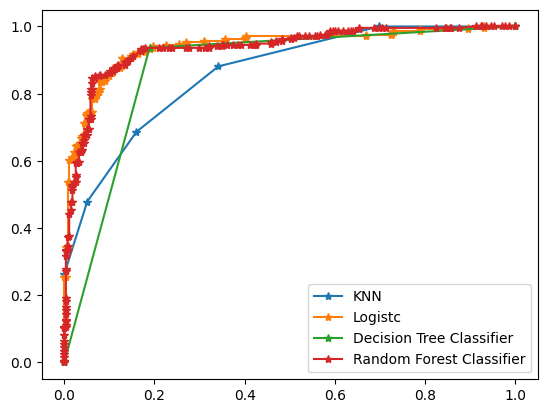

In [82]:
import matplotlib.pyplot as plt

plt.plot(fprKNN , tprKNN , marker = '*' , label = "KNN")
plt.plot(fprLogistic, tprLogistic , marker = '*' , label = "Logistc")
plt.plot(fprDTC ,tprDTC , marker = '*' , label = "Decision Tree Classifier")
plt.plot(fprRFC ,tprRFC , marker = '*' , label = "Random Forest Classifier")

plt.legend()
plt.show()